In [1]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
from scipy import stats
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
import sklearn.feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from IPython.display import display, HTML
import xgboost as xgb
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [19]:
df = pd.read_csv('gene_mutations_clinical_mskcc.txt', sep = "	",index_col=['PATIENT_ID','Tumor_Sample_Barcode'])
df.head()

,,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BABAM1,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CARM1,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC42,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2Ap14ARF,CDKN2Ap14IRF,CDKN2Ap16INK4A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSDE1,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,CYLD,CYSLTR2,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,DROSHA,DUSP4,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,ELF3,EP300,EPAS1,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERF,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH1,EZH2,FAM175A,FAM46C,FAM58A,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,GTF2I,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST3H3,HLA-A,HLA-B,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INPPL1,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KMT2A,KMT2B,KMT2C,KMT2D,KNSTRN,KRAS,LATS1,LATS2,LMO1,LYN,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAPK1,MAPK3,MAPKAP1,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MLL4,MPL,MRE11A,MSH2,MSH3,MSH6,MSI1,MSI2,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTHL1,NTRK1,NTRK2,NTRK3,NUF2,NUP93,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPARG,PPM1D,PPP2R1A,PPP4R2,PPP6C,PRDM1,PRDM14,PREX2,PRKAR1A,PRKCI,PRKD1,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAC2,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RRAGC,RRAS,RRAS2,RTEL1,RUNX1,RXRA,RYBP,SDHA,SDHAF2,SDHB,SDHC,SDHD,SESN1,SESN2,SESN3,SETD2,SETD8,SF3B1,SH2B3,SH2D1A,SHOC2,SHQ1,SLX4,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SMYD3,SOCS1,SOS1,SOX17,SOX2,SOX9,SPEN,SPOP,SPRED1,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK19,STK40,SUFU,SUZ12,SYK,TAP1,TAP2,TBX3,TCEB1,TCF3,TCF7L2,TEK,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP53BP1,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,UPF1,VEGFA,VHL,VTCN1,WHSC1,WHSC1L1,WT1,WWTR1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,TMB_SCORE,SEX,OS_MONTHS,OS_STATUS,AGE_GROUP,DRUG_TYPE,ONCOTREE_CODE,SAMPLE_TYPE,CANCER_TYPE
PATIENT_ID,Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000057,P-0000057-T01-IM3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [20]:
df.dtypes[df.dtypes !='float64']

SEX              object
OS_MONTHS         int64
OS_STATUS        object
AGE_GROUP        object
DRUG_TYPE        object
ONCOTREE_CODE    object
SAMPLE_TYPE      object
CANCER_TYPE      object
dtype: object

In [21]:
df['CANCER_TYPE'].unique()

array(['Breast Cancer', 'Esophagogastric Cancer', 'Bladder Cancer',
       'Non-Small Cell Lung Cancer', 'Glioma', 'Head and Neck Cancer',
       'Melanoma', 'Colorectal Cancer', 'Renal Cell Carcinoma',
       'Cancer of Unknown Primary', 'Skin Cancer, Non-Melanoma'],
      dtype=object)

In [22]:
#mapping to make it more readable
mapping = {'Breast Cancer': 'BRC', 'Esophagogastric Cancer':'ESC', 'Bladder Cancer':'BLC',
       'Non-Small Cell Lung Cancer':'NSCLC', 'Glioma':'GL', 'Head and Neck Cancer':'HNC',
       'Melanoma':'ML', 'Colorectal Cancer':'CC', 'Renal Cell Carcinoma':'RCC',
       'Cancer of Unknown Primary':'CUPC', 'Skin Cancer, Non-Melanoma':'SC'}

#Inverse mapping for later use
inv_map = {v: k for k, v in mapping.items()}

df = df.replace({'CANCER_TYPE':mapping})
df.head()

,,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BABAM1,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CARM1,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC42,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2Ap14ARF,CDKN2Ap14IRF,CDKN2Ap16INK4A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSDE1,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,CYLD,CYSLTR2,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,DROSHA,DUSP4,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,ELF3,EP300,EPAS1,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERF,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH1,EZH2,FAM175A,FAM46C,FAM58A,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,GTF2I,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST3H3,HLA-A,HLA-B,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INPPL1,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KMT2A,KMT2B,KMT2C,KMT2D,KNSTRN,KRAS,LATS1,LATS2,LMO1,LYN,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAPK1,MAPK3,MAPKAP1,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MLL4,MPL,MRE11A,MSH2,MSH3,MSH6,MSI1,MSI2,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTHL1,NTRK1,NTRK2,NTRK3,NUF2,NUP93,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPARG,PPM1D,PPP2R1A,PPP4R2,PPP6C,PRDM1,PRDM14,PREX2,PRKAR1A,PRKCI,PRKD1,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAC2,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RRAGC,RRAS,RRAS2,RTEL1,RUNX1,RXRA,RYBP,SDHA,SDHAF2,SDHB,SDHC,SDHD,SESN1,SESN2,SESN3,SETD2,SETD8,SF3B1,SH2B3,SH2D1A,SHOC2,SHQ1,SLX4,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SMYD3,SOCS1,SOS1,SOX17,SOX2,SOX9,SPEN,SPOP,SPRED1,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK19,STK40,SUFU,SUZ12,SYK,TAP1,TAP2,TBX3,TCEB1,TCF3,TCF7L2,TEK,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP53BP1,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,UPF1,VEGFA,VHL,VTCN1,WHSC1,WHSC1L1,WT1,WWTR1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,TMB_SCORE,SEX,OS_MONTHS,OS_STATUS,AGE_GROUP,DRUG_TYPE,ONCOTREE_CODE,SAMPLE_TYPE,CANCER_TYPE
PATIENT_ID,Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000057,P-0000057-T01-IM3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [23]:
# Encode the labels i.e. the LIVING or the DECEASED
#PREPROCESSING OF FEATURES
#encoding OS_STATUS
labelenc = preprocessing.LabelEncoder()
labelenc.fit(df['OS_STATUS'])
status_trans = labelenc.transform(df['OS_STATUS'])
df['y']=status_trans

df.head()

,,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BABAM1,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CARM1,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC42,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2Ap14ARF,CDKN2Ap14IRF,CDKN2Ap16INK4A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSDE1,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,CYLD,CYSLTR2,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,DROSHA,DUSP4,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,ELF3,EP300,EPAS1,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERF,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH1,EZH2,FAM175A,FAM46C,FAM58A,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,GTF2I,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST3H3,HLA-A,HLA-B,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INPPL1,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KMT2A,KMT2B,KMT2C,KMT2D,KNSTRN,KRAS,LATS1,LATS2,LMO1,LYN,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAPK1,MAPK3,MAPKAP1,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MLL4,MPL,MRE11A,MSH2,MSH3,MSH6,MSI1,MSI2,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTHL1,NTRK1,NTRK2,NTRK3,NUF2,NUP93,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPARG,PPM1D,PPP2R1A,PPP4R2,PPP6C,PRDM1,PRDM14,PREX2,PRKAR1A,PRKCI,PRKD1,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAC2,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RRAGC,RRAS,RRAS2,RTEL1,RUNX1,RXRA,RYBP,SDHA,SDHAF2,SDHB,SDHC,SDHD,SESN1,SESN2,SESN3,SETD2,SETD8,SF3B1,SH2B3,SH2D1A,SHOC2,SHQ1,SLX4,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SMYD3,SOCS1,SOS1,SOX17,SOX2,SOX9,SPEN,SPOP,SPRED1,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK19,STK40,SUFU,SUZ12,SYK,TAP1,TAP2,TBX3,TCEB1,TCF3,TCF7L2,TEK,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP53BP1,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,UPF1,VEGFA,VHL,VTCN1,WHSC1,WHSC1L1,WT1,WWTR1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,TMB_SCORE,SEX,OS_MONTHS,OS_STATUS,AGE_GROUP,DRUG_TYPE,ONCOTREE_CODE,SAMPLE_TYPE,CANCER_TYPE,y
PATIENT_ID,Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000057,P-0000057-T01-IM3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

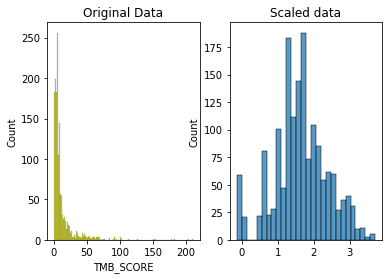

In [24]:
#encoding TMB_SCORE, which has exponential distribution
#Hence we use BOX-COX transformation to scale the data

TMB_SCORE_TRANS,_ = stats.boxcox(df['TMB_SCORE'])
df['TMB_SCORE_TRANS'] = TMB_SCORE_TRANS
fig, ax=plt.subplots(1,2)
sns.histplot(df['TMB_SCORE'], ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.histplot(TMB_SCORE_TRANS, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

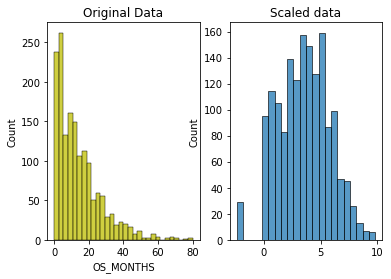

In [25]:
#encoding OS_MONTHS, which has exponential distribution
#Hence we use BOX-COX transformation to scale the data
OS_MONTHS_TRANS,_ = stats.boxcox(df['OS_MONTHS']+0.01)
df['OS_MONTHS_TRANS'] = OS_MONTHS_TRANS
#X['OS_MONTHS_TRANS'] = OS_MONTHS_TRANS
fig, ax=plt.subplots(1,2)
sns.histplot(df['OS_MONTHS'], ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.histplot(OS_MONTHS_TRANS, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

In [26]:
df['DRUG_TYPE_PD1']=[1 if any([drg_val=='PD-1/PDL-1', drg_val=='Combo']) else 0 for drg_val in df['DRUG_TYPE']]
df['DRUG_TYPE_CTLA4']=[1 if any([drg_val=='CTLA4', drg_val=='Combo']) else 0 for drg_val in df['DRUG_TYPE']]

In [27]:
df = df.replace({'AGE_GROUP' : { '>71' : '71-100', '<30' : '0-30' }})

In [28]:
get_dummy_cols = ['SEX', 'AGE_GROUP', 'SAMPLE_TYPE', 'ONCOTREE_CODE','CANCER_TYPE']
df_copy = pd.get_dummies(df, columns=get_dummy_cols, prefix = get_dummy_cols)

In [29]:
columns_to_drop = ['TMB_SCORE', 'DRUG_TYPE','OS_STATUS','OS_MONTHS']
df_copy.drop(columns_to_drop,axis=1,inplace=True)

In [30]:
df_copy.to_pickle('filtered_mskcc.pkl')

In [31]:
X = pd.read_pickle('filtered_mskcc.pkl')

In [32]:
#Extract y
y=X['y']
columns_to_drop = ['y']
X_copy = X.drop(columns_to_drop,axis=1)
X_copy.reset_index(drop=True)

x_train, x_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.25, random_state=42)

In [33]:
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.73%


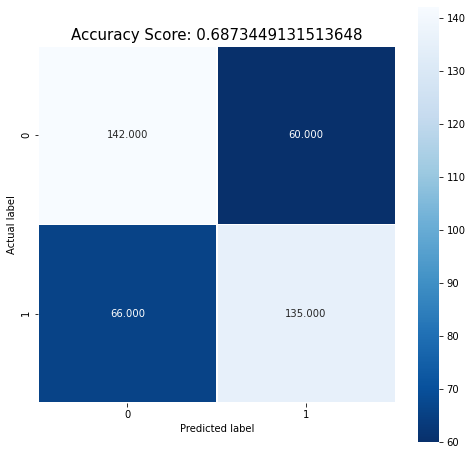

In [34]:
score = model.score(x_test, y_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
fig.savefig("cm_pp.jpg")

In [35]:
from sklearn.model_selection import cross_val_score
kfold = RepeatedStratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, X_copy, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 70.30% (3.62%)


In [74]:
def modelfit(alg, X, y,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(data=X, label=y)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=None)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X, y,eval_metric='auc')
        
    #Predict training set:
    y_predictions = alg.predict(X)
    y_predprob = alg.predict_proba(X)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y.values, y_predictions))
    print(metrics.confusion_matrix(y.values, y_predictions))
    print(metrics.classification_report(y.values, y_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))
    plt.figure(figsize=(30,10))               
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.777
[[642 160]
 [199 609]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       802
           1       0.79      0.75      0.77       808

    accuracy                           0.78      1610
   macro avg       0.78      0.78      0.78      1610
weighted avg       0.78      0.78      0.78      1610

AUC Score (Train): 0.866852


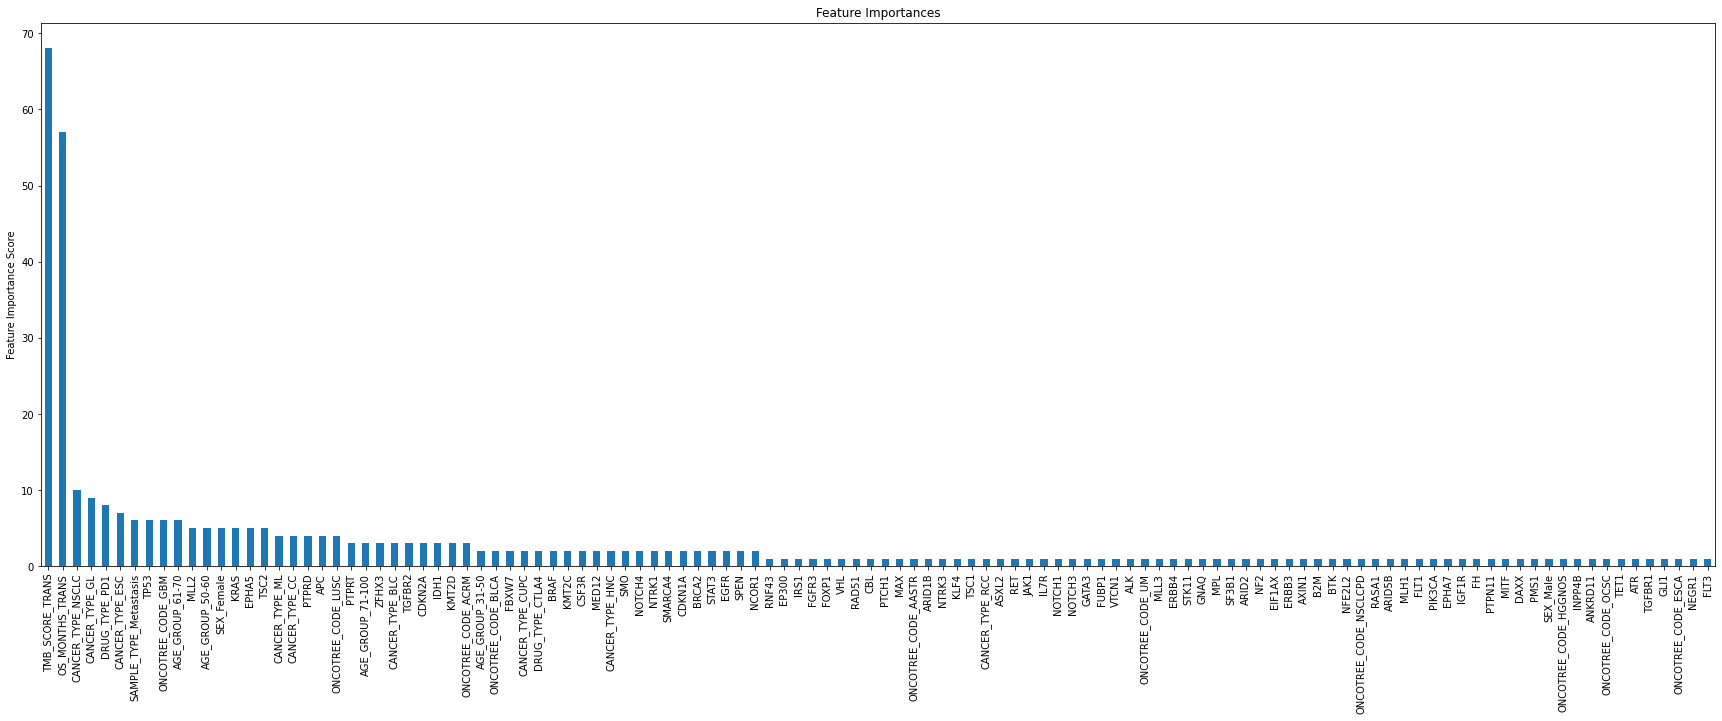

In [155]:

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, X_copy, y)

In [168]:
params={
 "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [171]:
from sklearn.model_selection import RandomizedSearchCV
xgb_classifier = XGBClassifier()
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(X_copy, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   54.4s finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [172]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [173]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Model Report
Accuracy : 0.818
[[671 131]
 [162 646]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       802
           1       0.83      0.80      0.82       808

    accuracy                           0.82      1610
   macro avg       0.82      0.82      0.82      1610
weighted avg       0.82      0.82      0.82      1610

AUC Score (Train): 0.902328


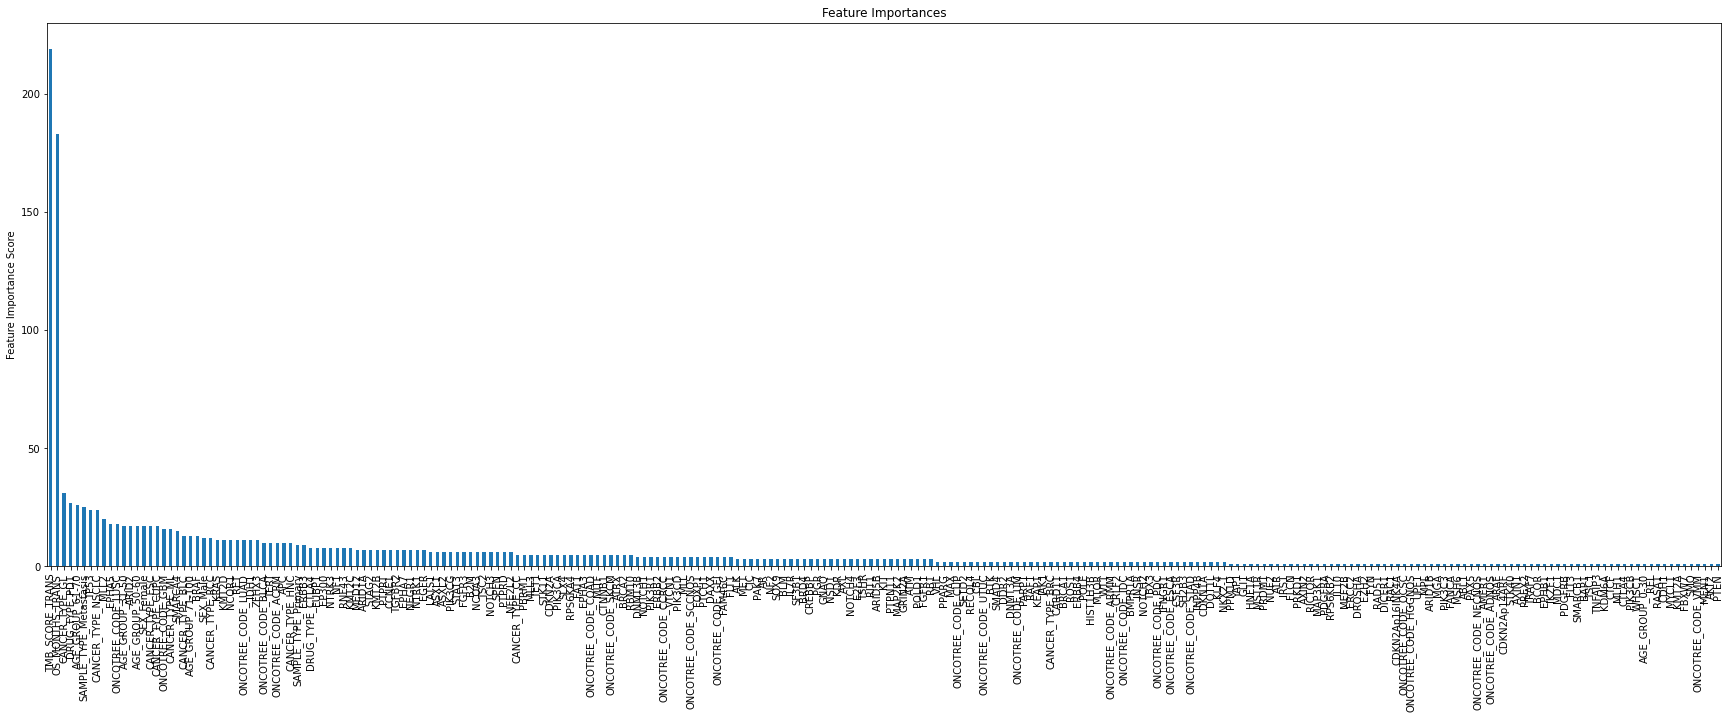

In [175]:
xgb2 = XGBClassifier(
 base_score=0.5,
 booster='gbtree',
 colsample_bylevel=1,
 learning_rate =0.05,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.5,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 importance_type='gain',
 max_delta_step=0,
 n_jobs=0,
 num_parallel_tree=1,
 random_state=0,
 tree_method='exact',
 seed=27)
modelfit(xgb2, X_copy, y)

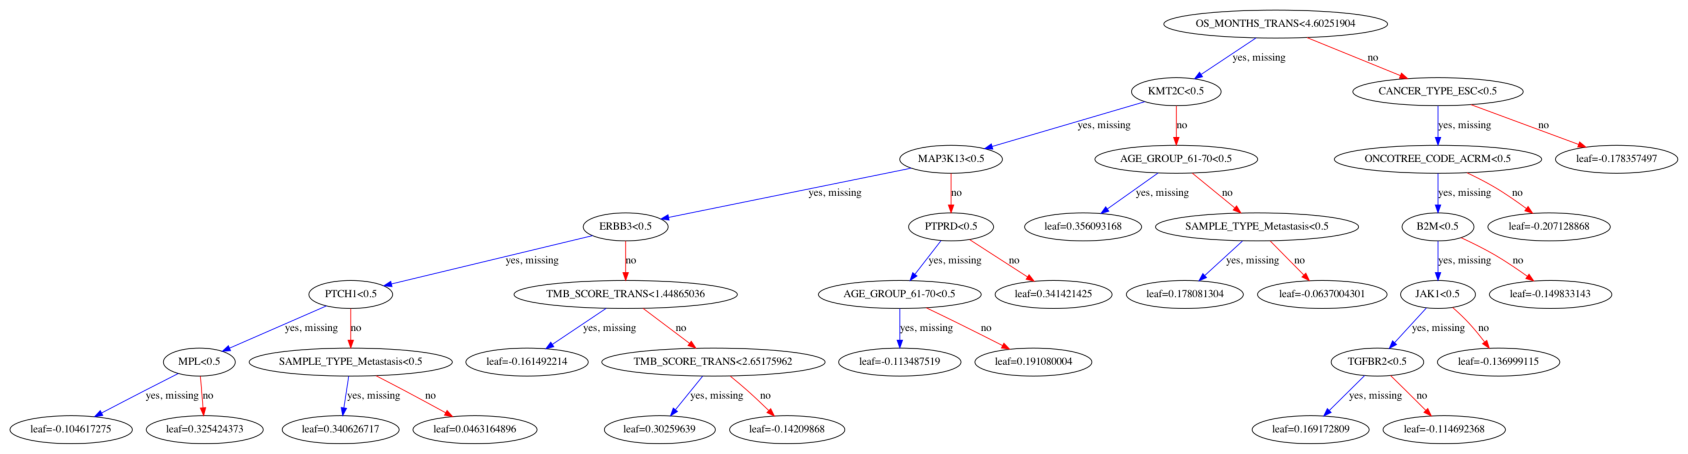

In [54]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(model, num_trees=4, ax=ax)
plt.show()

In [45]:
print(model.feature_importances_)

[0.00195305 0.         0.         0.         0.         0.
 0.00288348 0.         0.01272434 0.0015444  0.00527032 0.0022462
 0.         0.00357979 0.00305226 0.00713715 0.         0.00144391
 0.         0.00470335 0.00354311 0.         0.         0.
 0.00301445 0.         0.00294076 0.00414504 0.         0.00530044
 0.         0.         0.         0.         0.         0.
 0.         0.00239615 0.         0.         0.         0.00554827
 0.00270814 0.00171265 0.00106012 0.         0.01033346 0.
 0.0056108  0.         0.         0.         0.00076439 0.
 0.         0.         0.00477105 0.         0.         0.
 0.00481787 0.         0.         0.00587341 0.         0.
 0.         0.         0.00301269 0.00190464 0.0023216  0.00488872
 0.         0.001457   0.         0.         0.         0.
 0.         0.00200256 0.         0.00364174 0.         0.
 0.         0.00174394 0.         0.         0.00279479 0.00458606
 0.0007271  0.         0.         0.         0.00250855 0.
 0.      

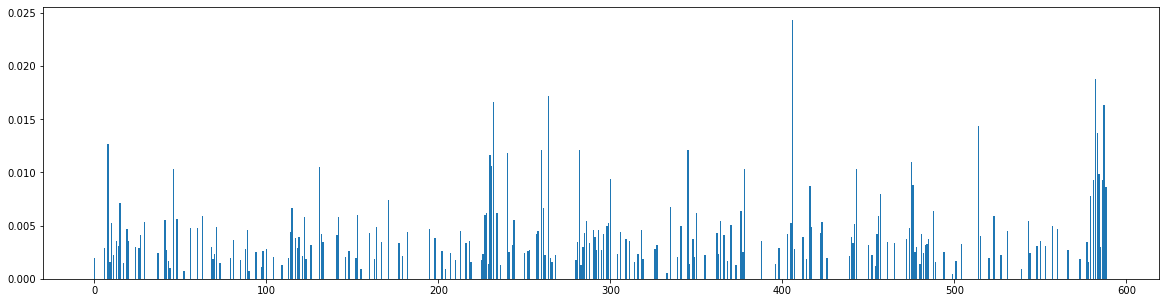

In [55]:
plt.figure(figsize=(20,5)) 
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [56]:
feature_list=list(X_copy.columns) #list of features 
features = np.array(feature_list)

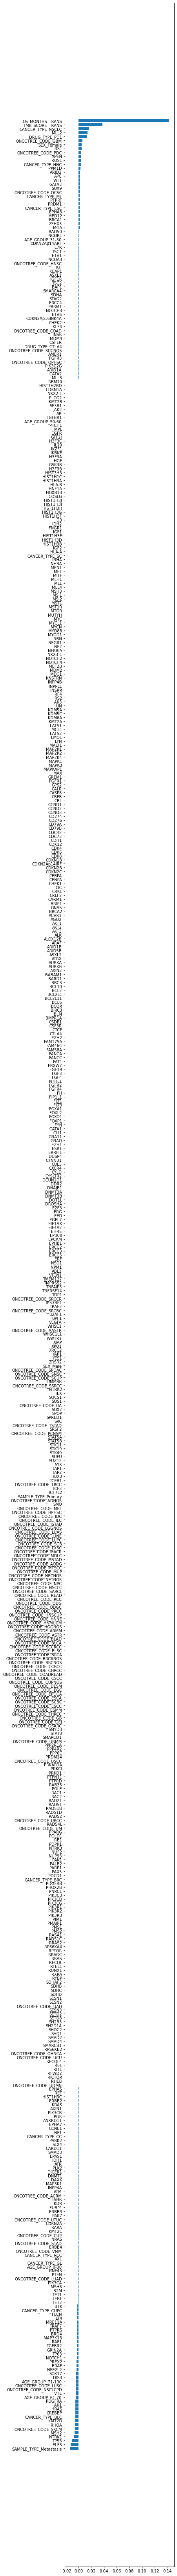

In [61]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, x_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(5,120)) 
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.show()

In [65]:
features[sorted_idx][::-1]

array(['OS_MONTHS_TRANS', 'TMB_SCORE_TRANS', 'CANCER_TYPE_NSCLC', 'MLL2',
       'DRUG_TYPE_PD1', 'ONCOTREE_CODE_GBM', 'SEX_Female', 'IRS1',
       'ONCOTREE_CODE_PDC', 'SPEN', 'ROS1', 'CANCER_TYPE_HNC', 'PPM1D',
       'ARID2', 'APC', 'WT1', 'GATA3', 'SOX9', 'ONCOTREE_CODE_OCSC',
       'CANCER_TYPE_ML', 'PTPRT', 'PRDM1', 'CANCER_TYPE_ESC', 'EPHA3',
       'MED12', 'BRCA1', 'ZFHX3', 'MGA', 'RAD50', 'NCOR1',
       'AGE_GROUP_31-50', 'CDKN2Ap14ARF', 'IL7R', 'TSC1', 'ETV1', 'NCOA3',
       'ONCOTREE_CODE_HNSC', 'KIT', 'KEAP1', 'ASXL1', 'IGF1R', 'TSC2',
       'BAP1', 'SMARCA4', 'SDHA', 'STAG2', 'ERCC4', 'PBRM1', 'NOTCH3',
       'ETV6', 'CDKN2Ap16INK4A', 'CHEK2', 'KLF4', 'ONCOTREE_CODE_COAD',
       'INSR', 'MDM4', 'CSF1R', 'DRUG_TYPE_CTLA4', 'ONCOTREE_CODE_SCCNOS',
       'AMER1', 'FGFR3', 'ONCOTREE_CODE_OPHSC', 'PIK3C2G', 'ARID1A',
       'GATA2', 'MLL3', 'RBM10', 'HIST1H2BD', 'CDKN1A', 'NKX2-1', 'PLCG2',
       'KMT2B', 'SF3B1', 'JAK2', 'AR', 'TGFBR1', 'AGE_GROUP_50-60',
       'PTCH

In [80]:
from sklearn.feature_selection import SelectFromModel
thresholds = sorted(model.feature_importances_)
thresholds = set([round(x,3) for x in thresholds])
for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)

    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)

    select_X_test = selection.transform(x_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


Thresh=0.000, n=590, Accuracy: 68.73%
Thresh=0.001, n=220, Accuracy: 69.48%
Thresh=0.004, n=93, Accuracy: 72.21%
Thresh=0.002, n=183, Accuracy: 69.98%
Thresh=0.003, n=135, Accuracy: 71.22%
Thresh=0.005, n=58, Accuracy: 68.73%
Thresh=0.006, n=40, Accuracy: 69.73%
Thresh=0.007, n=30, Accuracy: 69.48%
Thresh=0.008, n=26, Accuracy: 68.73%
Thresh=0.009, n=23, Accuracy: 67.74%
Thresh=0.010, n=19, Accuracy: 67.74%
Thresh=0.011, n=13, Accuracy: 54.84%
Thresh=0.012, n=11, Accuracy: 54.84%
Thresh=0.013, n=7, Accuracy: 55.33%
Thresh=0.014, n=6, Accuracy: 56.08%
Thresh=0.016, n=5, Accuracy: 53.35%
Thresh=0.024, n=1, Accuracy: 49.88%
Thresh=0.019, n=1, Accuracy: 49.88%
Thresh=0.017, n=3, Accuracy: 49.88%


In [97]:
sorted(perm_importance.importances_mean.tolist())

[-0.013895781637717075,
 -0.01240694789081882,
 -0.009925558312655047,
 -0.006947890818858516,
 -0.0059553349875929975,
 -0.005459057071960238,
 -0.005459057071960238,
 -0.005459057071960238,
 -0.004962779156327502,
 -0.004962779156327502,
 -0.004962779156327479,
 -0.004962779156327479,
 -0.004962779156327479,
 -0.003970223325062005,
 -0.003970223325061961,
 -0.003970223325061961,
 -0.0034739454094292244,
 -0.0034739454094292244,
 -0.0034739454094292023,
 -0.0034739454094292023,
 -0.0029776674937964875,
 -0.0029776674937964653,
 -0.0029776674937964432,
 -0.0024813895781637283,
 -0.0024813895781637283,
 -0.0024813895781637283,
 -0.0024813895781637062,
 -0.0024813895781637062,
 -0.0024813895781637062,
 -0.002481389578163684,
 -0.002481389578163684,
 -0.002481389578163684,
 -0.002481389578163684,
 -0.002481389578163684,
 -0.002481389578163684,
 -0.0019851116625309918,
 -0.0019851116625309697,
 -0.0014888337468982327,
 -0.0014888337468982327,
 -0.0014888337468982327,
 -0.001488833746898232

In [103]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.1553 ± 0.0228,OS_MONTHS_TRANS
0.0412 ± 0.0128,TMB_SCORE_TRANS
0.0164 ± 0.0212,CANCER_TYPE_NSCLC
0.0164 ± 0.0092,DRUG_TYPE_PD1
0.0069 ± 0.0058,SPEN
0.0060 ± 0.0051,ROS1
0.0055 ± 0.0173,MLL2
0.0050 ± 0.0031,ONCOTREE_CODE_PDC
0.0045 ± 0.0020,IRS1
0.0045 ± 0.0073,ONCOTREE_CODE_GBM


In [109]:
#Feature Selection : Methods followed

#Filter methods: Removing almost constant features with very little variance
lenp=[]
print ('{:<30}{:<30}'.format('Variance <', 'Number of columns'))
for i in range(0,25):
    var = fs.VarianceThreshold(threshold=(i/100))
    var.fit(X_copy)
    dropped_columns = [column for column in X_copy.columns
                    if column not in X_copy.columns[var.get_support()]]
    lenp.append(len(dropped_columns))
    print ('{:<30}{:<30}'.format(i/100, len(dropped_columns)))


Variance <                    Number of columns             
0.0                           0                             
0.01                          250                           
0.02                          370                           
0.03                          450                           
0.04                          490                           
0.05                          514                           
0.06                          536                           
0.07                          550                           
0.08                          559                           
0.09                          564                           
0.1                           568                           
0.11                          572                           
0.12                          573                           
0.13                          574                           
0.14                          575                           
0.15                    

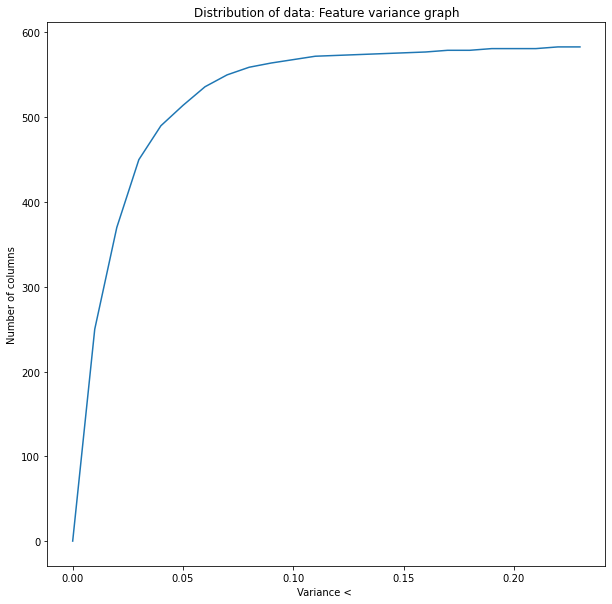

In [105]:
#plotting variance vs number of columns
fig = plt.figure(figsize=(10,10))
plt.plot([i/100 for i in range(0, 24)],lenp)
plt.xlabel("Variance < ")
plt.ylabel("Number of columns")
plt.title("Distribution of data: Feature variance graph")
plt.show()
fig.savefig("feature_variance.jpg")

In [135]:
#drop the data below variance threshold = 0.1
var = fs.VarianceThreshold(threshold=0.04)
var.fit(X_copy)
dropped_columns = [column for column in X_copy.columns
                    if column not in X_copy.columns[var.get_support()]]

#X_trans = var.transform(X)
X_filter1=X_copy.drop(labels=dropped_columns, axis=1, inplace=False)



#print(X_filter1.columns.to_list())
print("Features selected after removing constant or almost constant features:\n")
print(X_filter1.columns.to_list())
print(len(X_filter1.columns.to_list()))

Features selected after removing constant or almost constant features:

['ALK', 'APC', 'ARID1A', 'ARID1B', 'ARID2', 'ATM', 'ATR', 'ATRX', 'BRAF', 'BRCA2', 'CARD11', 'CDKN2A', 'CDKN2Ap14ARF', 'CDKN2Ap16INK4A', 'CREBBP', 'CTNNB1', 'DOT1L', 'EGFR', 'EP300', 'EPHA3', 'EPHA5', 'EPHA7', 'ERBB2', 'ERBB3', 'ERBB4', 'FAT1', 'FBXW7', 'FLT1', 'FLT4', 'GRIN2A', 'KDM5C', 'KDM6A', 'KDR', 'KEAP1', 'KRAS', 'MGA', 'MLL', 'MLL2', 'MLL3', 'MTOR', 'NF1', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'NOTCH4', 'NRAS', 'NSD1', 'NTRK3', 'PAK7', 'PBRM1', 'PDGFRA', 'PIK3C2G', 'PIK3CA', 'PIK3CG', 'POLE', 'PTEN', 'PTPRD', 'PTPRS', 'PTPRT', 'RB1', 'RBM10', 'ROS1', 'SETD2', 'SF3B1', 'SMARCA4', 'SPEN', 'STK11', 'TERT', 'TET2', 'TP53', 'TP63', 'VHL', 'ZFHX3', 'TMB_SCORE_TRANS', 'OS_MONTHS_TRANS', 'DRUG_TYPE_PD1', 'DRUG_TYPE_CTLA4', 'SEX_Female', 'SEX_Male', 'AGE_GROUP_31-50', 'AGE_GROUP_50-60', 'AGE_GROUP_61-70', 'AGE_GROUP_71-100', 'SAMPLE_TYPE_Metastasis', 'SAMPLE_TYPE_Primary', 'ONCOTREE_CODE_BLCA', 'ONCOTREE_CODE_CCRCC', 'ONCOT

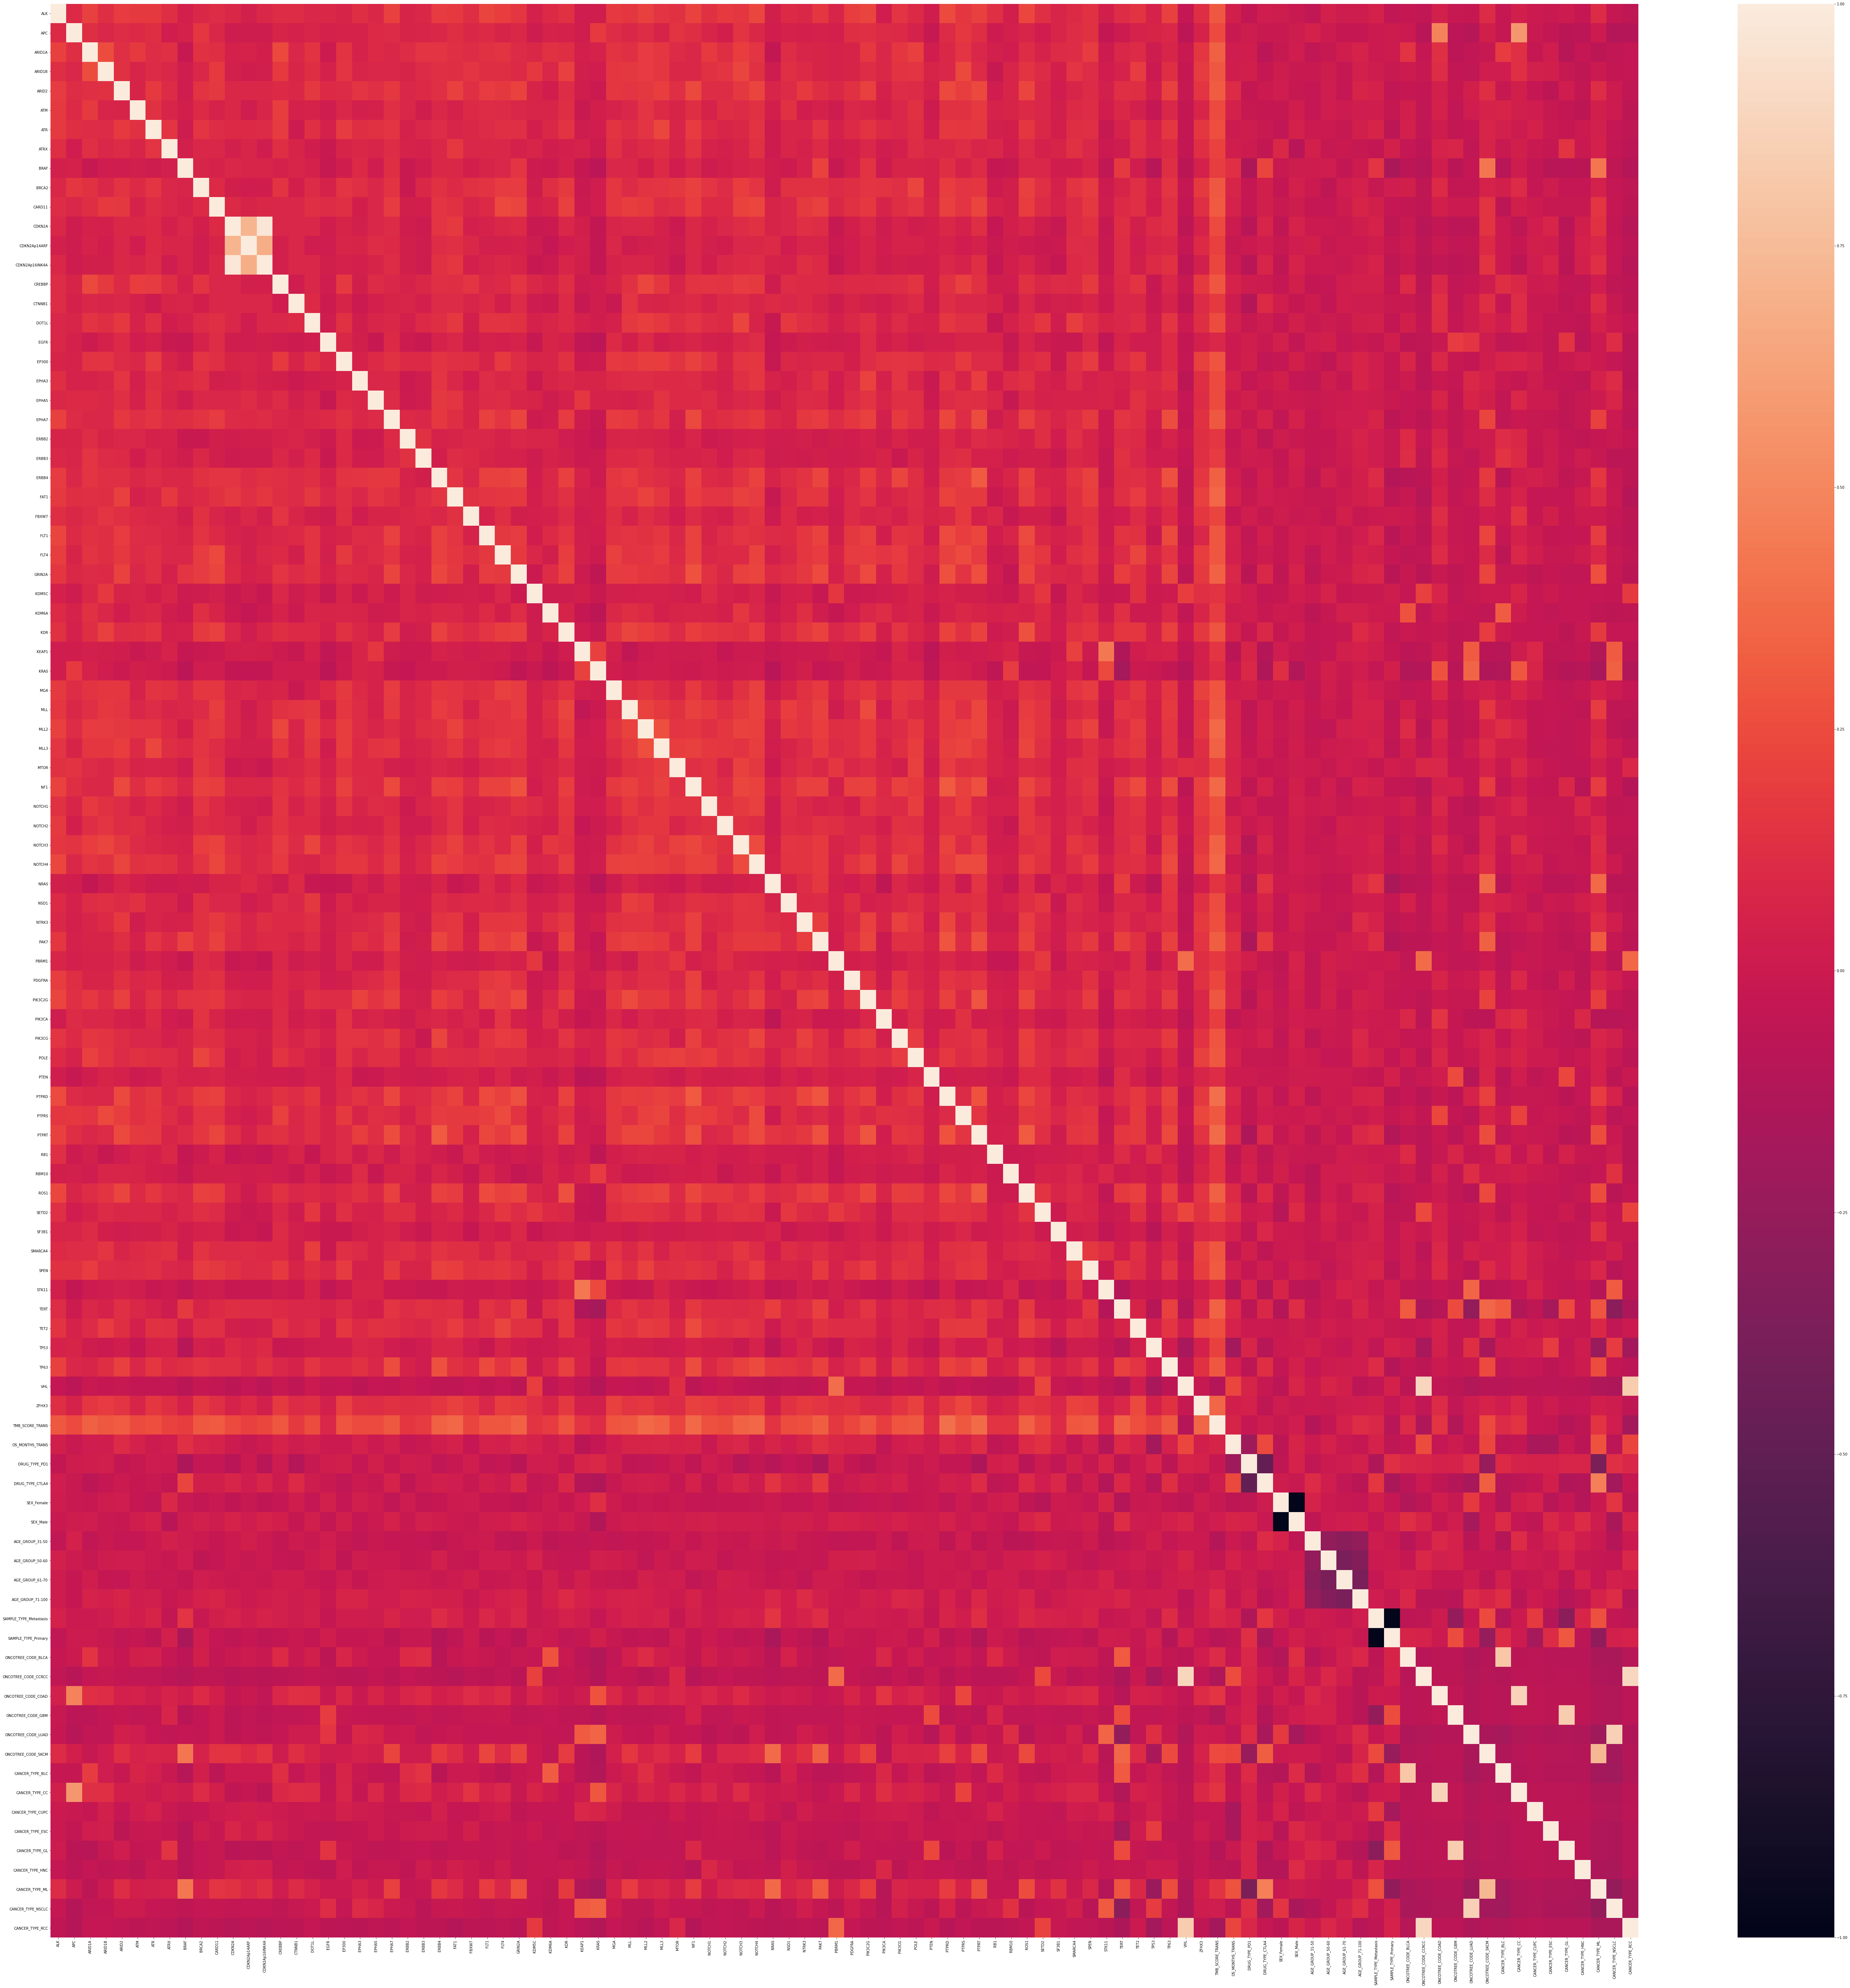

In [136]:
#Feature selection by detecting correlation between 2 features
#Visualisation of correlation matrix
corr_matrix = X_filter1.corr()
#print(corr_matrix)
len_corr,_ = corr_matrix.shape
#print(len_corr)
fig=plt.figure(figsize=(len_corr,len_corr))
sns.heatmap(corr_matrix)
fig.savefig("heatmap.jpg")

In [137]:
#Feature selection by detecting correlation between 2 features
corr_features=[]
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            print(corr_matrix.columns[i],corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            corr_features.append(colname)

print(corr_features)
            
X_filter=X_filter1.drop(labels=corr_features, axis=1, inplace=False)
X_filter=X_filter1.drop(labels=corr_features, axis=1, inplace=False)

CDKN2Ap14ARF CDKN2A
CDKN2Ap16INK4A CDKN2A
CDKN2Ap16INK4A CDKN2Ap14ARF
SEX_Male SEX_Female
SAMPLE_TYPE_Primary SAMPLE_TYPE_Metastasis
ONCOTREE_CODE_CCRCC VHL
CANCER_TYPE_BLC ONCOTREE_CODE_BLCA
CANCER_TYPE_CC APC
CANCER_TYPE_CC ONCOTREE_CODE_COAD
CANCER_TYPE_GL ONCOTREE_CODE_GBM
CANCER_TYPE_ML ONCOTREE_CODE_SKCM
CANCER_TYPE_NSCLC ONCOTREE_CODE_LUAD
CANCER_TYPE_RCC VHL
CANCER_TYPE_RCC ONCOTREE_CODE_CCRCC
['CDKN2Ap14ARF', 'CDKN2Ap16INK4A', 'CDKN2Ap16INK4A', 'SEX_Male', 'SAMPLE_TYPE_Primary', 'ONCOTREE_CODE_CCRCC', 'CANCER_TYPE_BLC', 'CANCER_TYPE_CC', 'CANCER_TYPE_CC', 'CANCER_TYPE_GL', 'CANCER_TYPE_ML', 'CANCER_TYPE_NSCLC', 'CANCER_TYPE_RCC', 'CANCER_TYPE_RCC']


In [138]:
print(len(X_filter.columns),X_filter.columns)


89 Index(['ALK', 'APC', 'ARID1A', 'ARID1B', 'ARID2', 'ATM', 'ATR', 'ATRX', 'BRAF', 'BRCA2', 'CARD11', 'CDKN2A', 'CREBBP', 'CTNNB1', 'DOT1L', 'EGFR', 'EP300', 'EPHA3', 'EPHA5', 'EPHA7', 'ERBB2', 'ERBB3', 'ERBB4', 'FAT1', 'FBXW7', 'FLT1', 'FLT4', 'GRIN2A', 'KDM5C', 'KDM6A', 'KDR', 'KEAP1', 'KRAS', 'MGA', 'MLL', 'MLL2', 'MLL3', 'MTOR', 'NF1', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'NOTCH4', 'NRAS', 'NSD1', 'NTRK3', 'PAK7', 'PBRM1', 'PDGFRA', 'PIK3C2G', 'PIK3CA', 'PIK3CG', 'POLE', 'PTEN', 'PTPRD', 'PTPRS', 'PTPRT', 'RB1', 'RBM10', 'ROS1', 'SETD2', 'SF3B1', 'SMARCA4', 'SPEN', 'STK11', 'TERT', 'TET2', 'TP53', 'TP63', 'VHL', 'ZFHX3', 'TMB_SCORE_TRANS', 'OS_MONTHS_TRANS', 'DRUG_TYPE_PD1', 'DRUG_TYPE_CTLA4', 'SEX_Female', 'AGE_GROUP_31-50', 'AGE_GROUP_50-60', 'AGE_GROUP_61-70', 'AGE_GROUP_71-100', 'SAMPLE_TYPE_Metastasis', 'ONCOTREE_CODE_BLCA', 'ONCOTREE_CODE_COAD', 'ONCOTREE_CODE_GBM', 'ONCOTREE_CODE_LUAD', 'ONCOTREE_CODE_SKCM', 'CANCER_TYPE_CUPC', 'CANCER_TYPE_ESC', 'CANCER_TYPE_HNC'], dtype='object')

In [140]:
x_train, x_test, y_train, y_test = train_test_split(X_filter, y, test_size=0.25, random_state=42)
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.98%



Model Report
Accuracy : 0.7665
[[653 149]
 [227 581]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       802
           1       0.80      0.72      0.76       808

    accuracy                           0.77      1610
   macro avg       0.77      0.77      0.77      1610
weighted avg       0.77      0.77      0.77      1610

AUC Score (Train): 0.861530


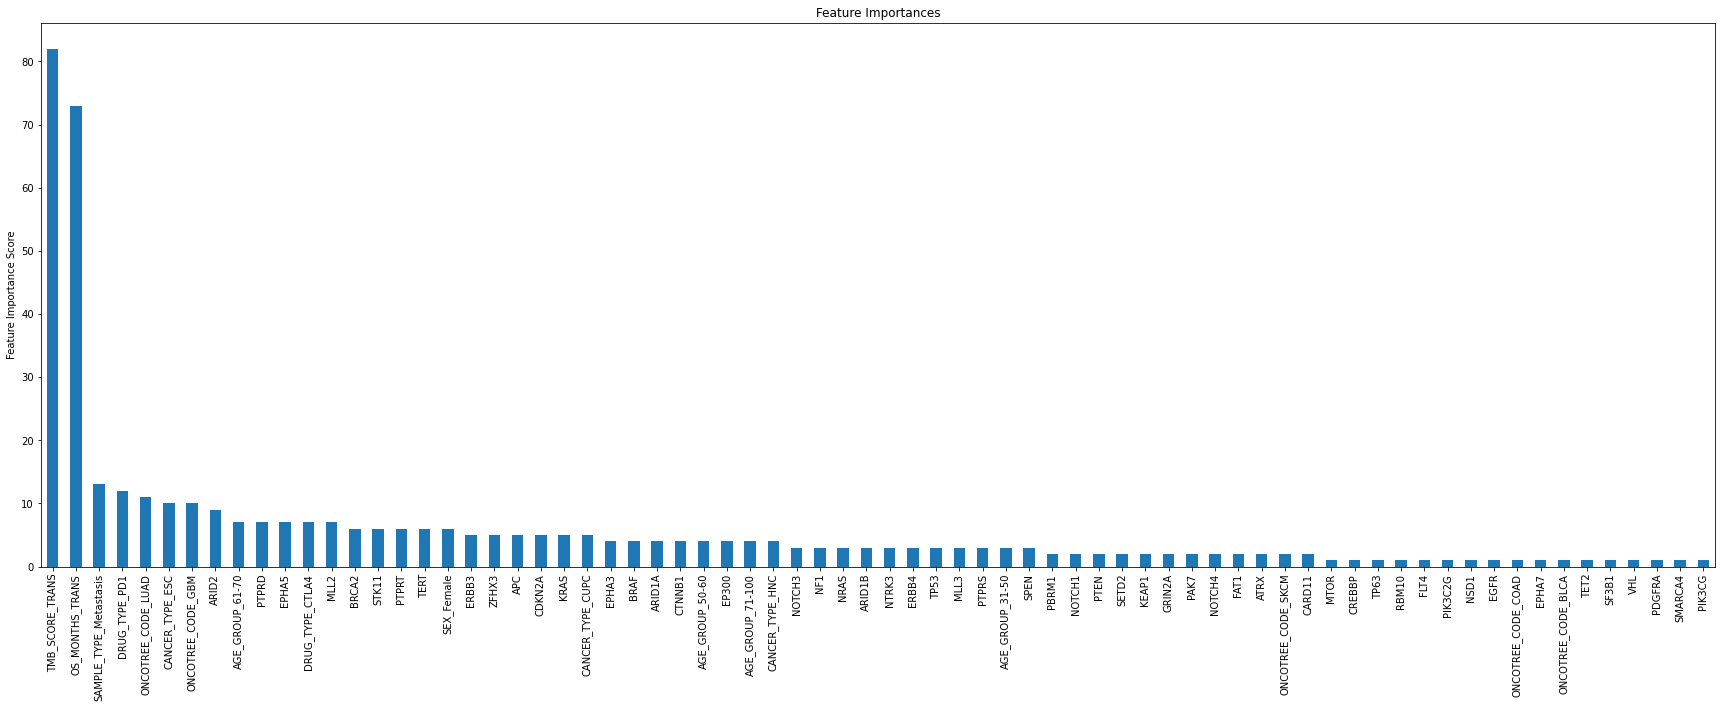

In [141]:
modelfit(xgb1, X_filter, y)


Model Report
Accuracy : 0.8087
[[664 138]
 [170 638]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       802
           1       0.82      0.79      0.81       808

    accuracy                           0.81      1610
   macro avg       0.81      0.81      0.81      1610
weighted avg       0.81      0.81      0.81      1610

AUC Score (Train): 0.898452


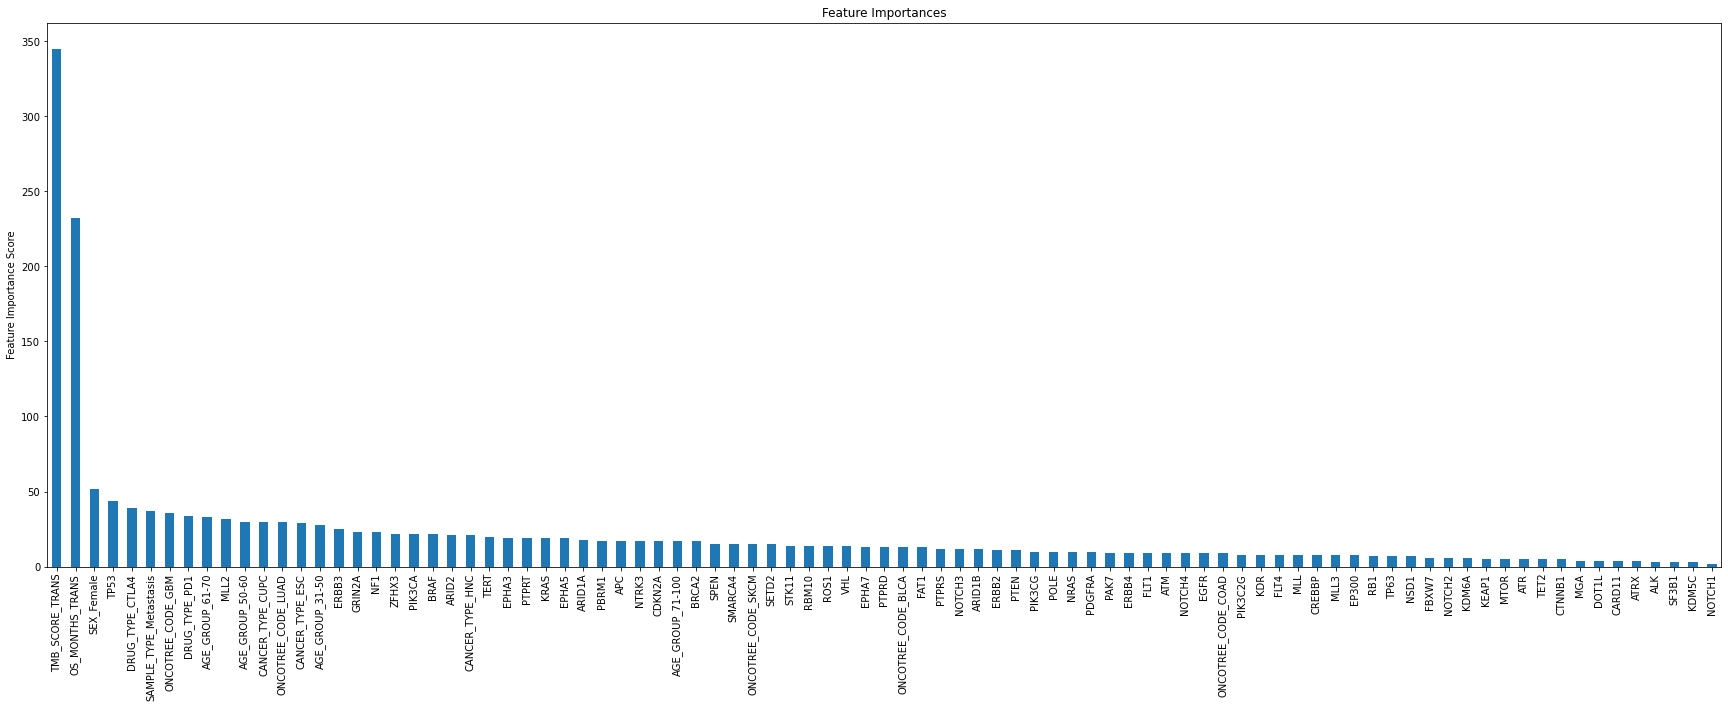

In [176]:
modelfit(xgb2,X_filter,y)

In [177]:
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(X_filter, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.6s finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [178]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Model Report
Accuracy : 0.8199
[[679 123]
 [167 641]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       802
           1       0.84      0.79      0.82       808

    accuracy                           0.82      1610
   macro avg       0.82      0.82      0.82      1610
weighted avg       0.82      0.82      0.82      1610

AUC Score (Train): 0.904180


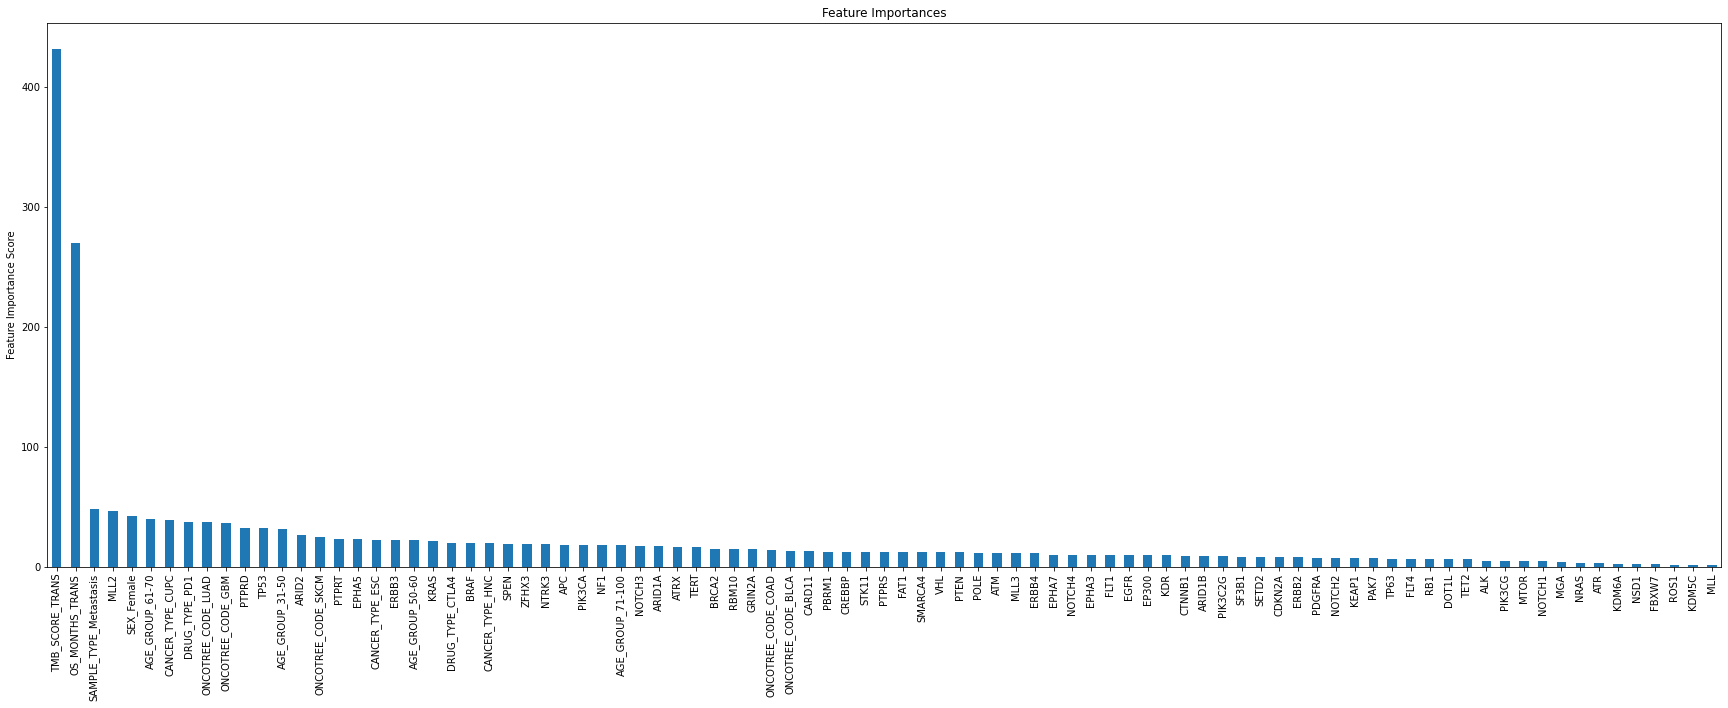

In [181]:
xgb3 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
modelfit(xgb3,X_filter,y)

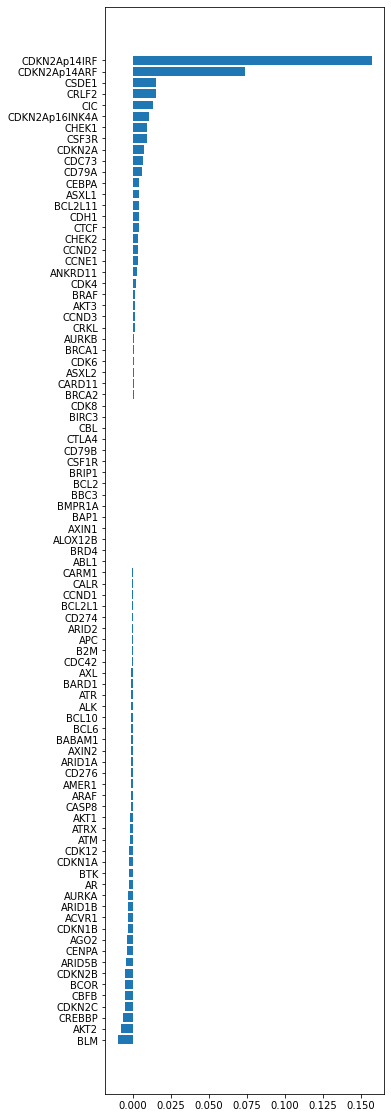

In [142]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, x_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(5,20)) 
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.show()

In [150]:
from sklearn.feature_selection import SelectFromModel
thresholds = sorted(model.feature_importances_)
thresholds = set([round(x,3) for x in thresholds])
for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
    
    if select_X_train.shape[1]>5:
        selection_model = XGBClassifier()
        selection_model.fit(select_X_train, y_train)

        select_X_test = selection.transform(x_test)
        predictions = selection_model.predict(select_X_test)
        accuracy = accuracy_score(y_test, predictions)
        print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))



Thresh=0.000, n=89, Accuracy: 69.98%
Thresh=0.003, n=87, Accuracy: 69.98%
Thresh=0.006, n=76, Accuracy: 70.22%
Thresh=0.004, n=86, Accuracy: 70.47%
Thresh=0.005, n=80, Accuracy: 67.49%
Thresh=0.007, n=69, Accuracy: 66.75%
Thresh=0.008, n=60, Accuracy: 68.49%
Thresh=0.009, n=51, Accuracy: 68.98%
Thresh=0.010, n=43, Accuracy: 68.24%
Thresh=0.011, n=36, Accuracy: 71.22%
Thresh=0.012, n=28, Accuracy: 65.51%
Thresh=0.013, n=22, Accuracy: 65.76%
Thresh=0.014, n=18, Accuracy: 67.00%
Thresh=0.015, n=16, Accuracy: 67.25%
Thresh=0.016, n=13, Accuracy: 68.24%
Thresh=0.017, n=12, Accuracy: 65.76%
Thresh=0.021, n=9, Accuracy: 68.49%
Thresh=0.018, n=12, Accuracy: 65.76%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_base.py:79: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"


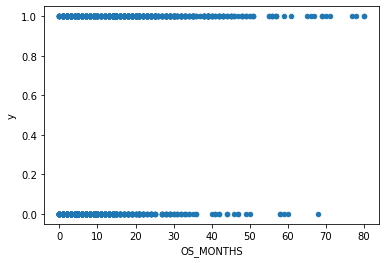

In [161]:
df.plot(x ='OS_MONTHS', y='y', kind = 'scatter')
plt.show()

In [162]:
X_filter.columns

Index(['ALK', 'APC', 'ARID1A', 'ARID1B', 'ARID2', 'ATM', 'ATR', 'ATRX', 'BRAF', 'BRCA2', 'CARD11', 'CDKN2A', 'CREBBP', 'CTNNB1', 'DOT1L', 'EGFR', 'EP300', 'EPHA3', 'EPHA5', 'EPHA7', 'ERBB2', 'ERBB3', 'ERBB4', 'FAT1', 'FBXW7', 'FLT1', 'FLT4', 'GRIN2A', 'KDM5C', 'KDM6A', 'KDR', 'KEAP1', 'KRAS', 'MGA', 'MLL', 'MLL2', 'MLL3', 'MTOR', 'NF1', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'NOTCH4', 'NRAS', 'NSD1', 'NTRK3', 'PAK7', 'PBRM1', 'PDGFRA', 'PIK3C2G', 'PIK3CA', 'PIK3CG', 'POLE', 'PTEN', 'PTPRD', 'PTPRS', 'PTPRT', 'RB1', 'RBM10', 'ROS1', 'SETD2', 'SF3B1', 'SMARCA4', 'SPEN', 'STK11', 'TERT', 'TET2', 'TP53', 'TP63', 'VHL', 'ZFHX3', 'TMB_SCORE_TRANS', 'OS_MONTHS_TRANS', 'DRUG_TYPE_PD1', 'DRUG_TYPE_CTLA4', 'SEX_Female', 'AGE_GROUP_31-50', 'AGE_GROUP_50-60', 'AGE_GROUP_61-70', 'AGE_GROUP_71-100', 'SAMPLE_TYPE_Metastasis', 'ONCOTREE_CODE_BLCA', 'ONCOTREE_CODE_COAD', 'ONCOTREE_CODE_GBM', 'ONCOTREE_CODE_LUAD', 'ONCOTREE_CODE_SKCM', 'CANCER_TYPE_CUPC', 'CANCER_TYPE_ESC', 'CANCER_TYPE_HNC'], dtype='object')

In [164]:
df.describe()

,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BABAM1,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CARM1,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC42,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2Ap14ARF,CDKN2Ap14IRF,CDKN2Ap16INK4A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSDE1,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,CYLD,CYSLTR2,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,DROSHA,DUSP4,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,ELF3,EP300,EPAS1,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERF,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH1,EZH2,FAM175A,FAM46C,FAM58A,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,GTF2I,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST3H3,HLA-A,HLA-B,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INPPL1,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KMT2A,KMT2B,KMT2C,KMT2D,KNSTRN,KRAS,LATS1,LATS2,LMO1,LYN,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAPK1,MAPK3,MAPKAP1,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MLL4,MPL,MRE11A,MSH2,MSH3,MSH6,MSI1,MSI2,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTHL1,NTRK1,NTRK2,NTRK3,NUF2,NUP93,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPARG,PPM1D,PPP2R1A,PPP4R2,PPP6C,PRDM1,PRDM14,PREX2,PRKAR1A,PRKCI,PRKD1,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAC2,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RRAGC,RRAS,RRAS2,RTEL1,RUNX1,RXRA,RYBP,SDHA,SDHAF2,SDHB,SDHC,SDHD,SESN1,SESN2,SESN3,SETD2,SETD8,SF3B1,SH2B3,SH2D1A,SHOC2,SHQ1,SLX4,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SMYD3,SOCS1,SOS1,SOX17,SOX2,SOX9,SPEN,SPOP,SPRED1,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK19,STK40,SUFU,SUZ12,SYK,TAP1,TAP2,TBX3,TCEB1,TCF3,TCF7L2,TEK,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP53BP1,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,UPF1,VEGFA,VHL,VTCN1,WHSC1,WHSC1L1,WT1,WWTR1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,TMB_SCORE,OS_MONTHS,y,TMB_SCORE_TRANS,OS_MONTHS_TRANS,DRUG_TYPE_PD1,DRUG_TYPE_CTLA4
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000